In [1]:
# Basir

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# read data
df = pd.read_csv('customer_shopping_data.csv')

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [2]:
# intial overview / early preprocessing

# check data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [3]:
# summary statistics
print(df.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [4]:
# checking missing values - none :)
print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [5]:
# for understanding categorical data
print(df['gender'].value_counts())
print()
print(df['category'].value_counts())
print()
print(df['payment_method'].value_counts())
print()
print(df['shopping_mall'].value_counts())

gender
Female    59482
Male      39975
Name: count, dtype: int64

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64


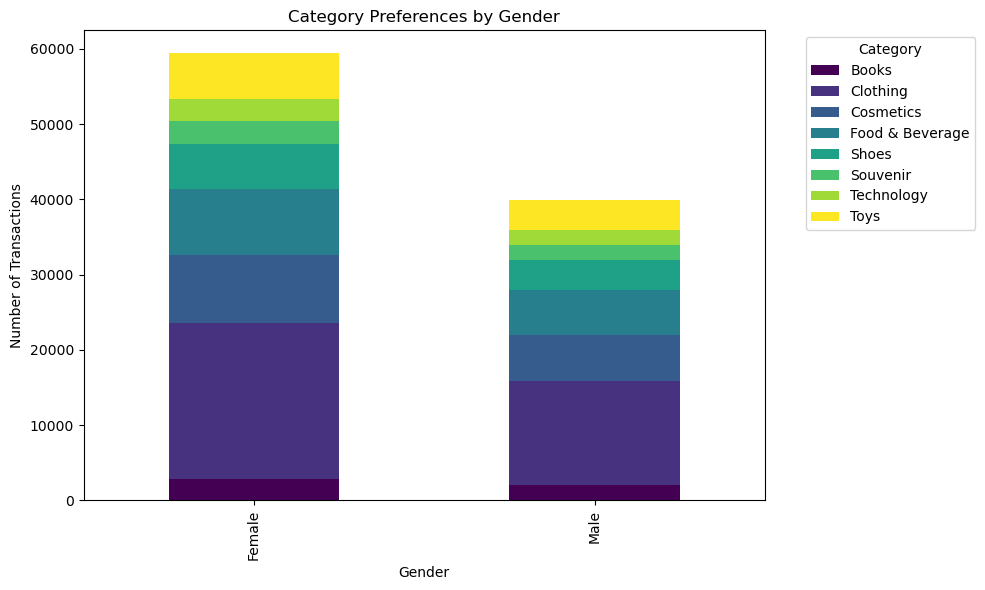

In [6]:
# preprocessing for gender

import matplotlib.pyplot as plt

gender_trends = df.groupby(['gender', 'category'])['invoice_no'].count().unstack()

gender_trends.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Category Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

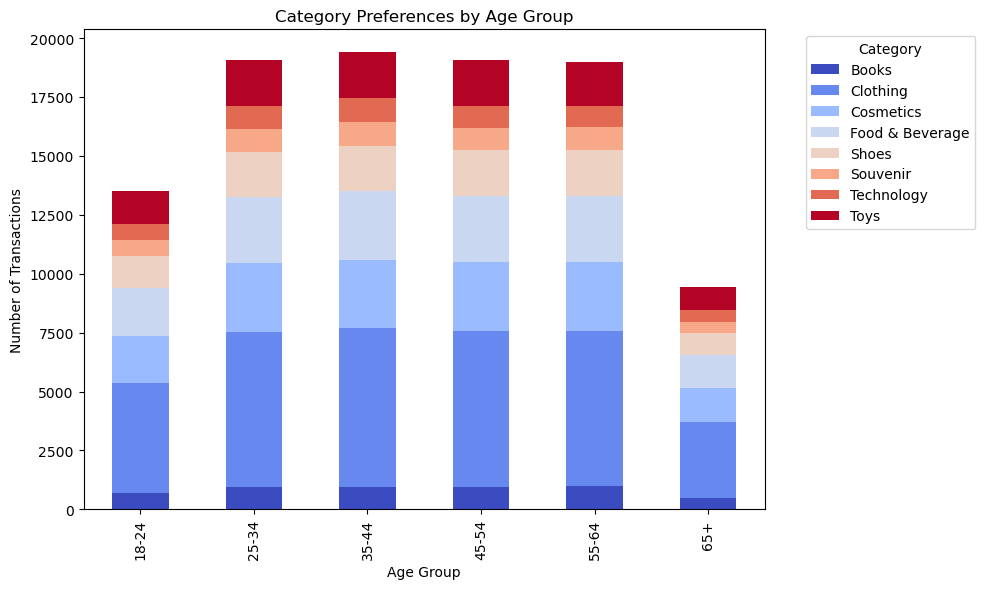

In [7]:
# preprocessing for age

df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100], 
                          labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], right=False)

age_trends = df.groupby(['age_group', 'category'])['invoice_no'].count().unstack()

age_trends.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', stacked=True)
plt.title('Category Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

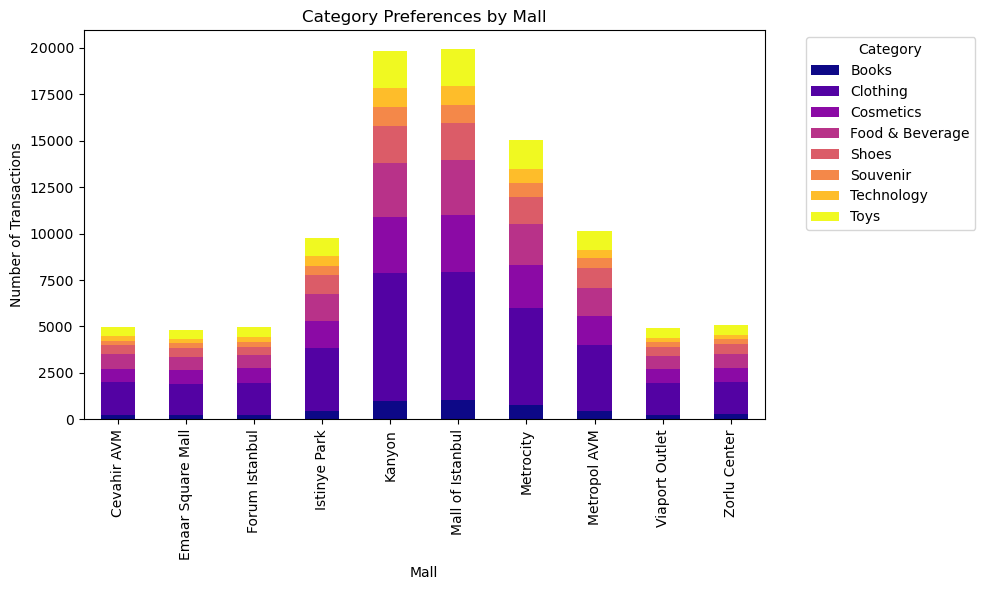

In [8]:
# preprocessing for mall prefrences

mall_trends = df.groupby(['shopping_mall', 'category'])['invoice_no'].count().unstack()

mall_trends.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Category Preferences by Mall')
plt.xlabel('Mall')
plt.ylabel('Number of Transactions')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
# revenue
df['revenue'] = df['price'] * df['quantity']

# summary statistics
print(df.groupby('shopping_mall')['revenue'].sum().sort_values(ascending=False))

shopping_mall
Mall of Istanbul     50872481.68
Kanyon               50554231.10
Metrocity            37302787.33
Metropol AVM         25379913.19
Istinye Park         24618827.68
Zorlu Center         12901053.82
Cevahir AVM          12645138.20
Viaport Outlet       12521339.72
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Name: revenue, dtype: float64


In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# train decision tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# make predictions
y_pred = tree_clf.predict(X_test)

# evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# define class_names 
class_names = tree_clf.classes_ # Get class names from the fitted classifier

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# visualize decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=class_names, filled=True, fontsize=10)
plt.show()

NameError: name 'X_train' is not defined

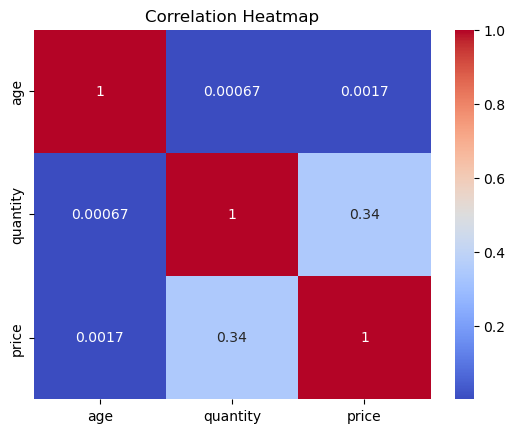

In [11]:
# correlation heatmap for numerical features
sns.heatmap(df[['age', 'quantity', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# data pre-processing

# one-hot encoding for categorical variables: converting gender, category, payment_method, and shopping_mall to numerical values using one-hot encoding or label encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'category', 'payment_method', 'shopping_mall'], drop_first=True)

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['day'] = df['invoice_date'].dt.day
df['day_of_week'] = df['invoice_date'].dt.dayofweek
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,revenue,year,month,day,day_of_week
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,25-34,7502.00,2022,8,5,4
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-24,5401.53,2021,12,12,6
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,18-24,300.08,2021,11,9,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,65+,15004.25,2021,5,16,6
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,45-54,242.40,2021,10,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,45-54,293.25,2022,9,21,2
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,25-34,20.92,2021,9,22,2
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,55-64,20.92,2021,3,28,6
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,55-64,16800.00,2021,3,16,1


In [ ]:
# one-hot encoding defining age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# creating 'age_group' column based on age
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df_encoded['age_group'] = df['age_group']

# defining target and predictors
target = 'age_group'
X = df_encoded.drop(columns=['age_group', 'invoice_no', 'customer_id', 'invoice_date'])  
y = df['age_group']

# output
print(X.head())
print(y.head())

   age  quantity    price   revenue  gender_Male  category_Clothing  \
0   28         5  1500.40   7502.00        False               True   
1   21         3  1800.51   5401.53         True              False   
2   20         1   300.08    300.08         True               True   
3   66         5  3000.85  15004.25        False              False   
4   53         4    60.60    242.40        False              False   

   category_Cosmetics  category_Food & Beverage  category_Shoes  \
0               False                     False           False   
1               False                     False            True   
2               False                     False           False   
3               False                     False            True   
4               False                     False           False   

   category_Souvenir  ...  payment_method_Debit Card  \
0              False  ...                      False   
1              False  ...                       True   
2 

In [15]:
# David

# exploratory data analysis for age, gender, and shopping mall columns
df['total_spending'] = df['quantity'] * df['price']

genders = df.groupby(['gender', 'category']).size().reset_index(name='count')
popularity_by_genders = genders.sort_values(['count', 'gender'], ascending=[False, True])

print(popularity_by_genders)

labels = ['Below 18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
bins = [0, 17, 25, 35, 45, 55, 65, 100]

df['ages'] = pd.cut(df['age'], labels=labels, right=False, bins=bins)

df_filtered = df[df['ages'] != 'Below 18']

age_categories = df_filtered.groupby(['ages', 'category']).size().reset_index(name='count')

popular_age_categories = age_categories.sort_values(['ages', 'count'], ascending=[True, False])

print("Age Groups:")
print(popular_age_categories)

mall_sectors = df.groupby(['shopping_mall', 'category']).size().reset_index(name='count')

malls = ['Emaar Square Mall', 'Cevahir AVM']
mall_summary = mall_sectors[mall_sectors['shopping_mall'].isin(malls)]

mall_summaries = mall_summary.sort_values(['shopping_mall', 'count'], ascending=[True, False])

print("Specific Mall Trends:")
print(mall_summaries)

    gender         category  count
1   Female         Clothing  20652
9     Male         Clothing  13835
2   Female        Cosmetics   9070
3   Female  Food & Beverage   8804
7   Female             Toys   6085
10    Male        Cosmetics   6027
11    Male  Food & Beverage   5972
4   Female            Shoes   5967
12    Male            Shoes   4067
15    Male             Toys   4002
5   Female         Souvenir   3017
6   Female       Technology   2981
0   Female            Books   2906
8     Male            Books   2075
14    Male       Technology   2015
13    Male         Souvenir   1982
Age Groups:
        ages         category  count
0   Below 18            Books      0
1   Below 18         Clothing      0
2   Below 18        Cosmetics      0
3   Below 18  Food & Beverage      0
4   Below 18            Shoes      0
5   Below 18         Souvenir      0
6   Below 18       Technology      0
7   Below 18             Toys      0
9      18-25         Clothing   4686
11     18-25  Food & Be

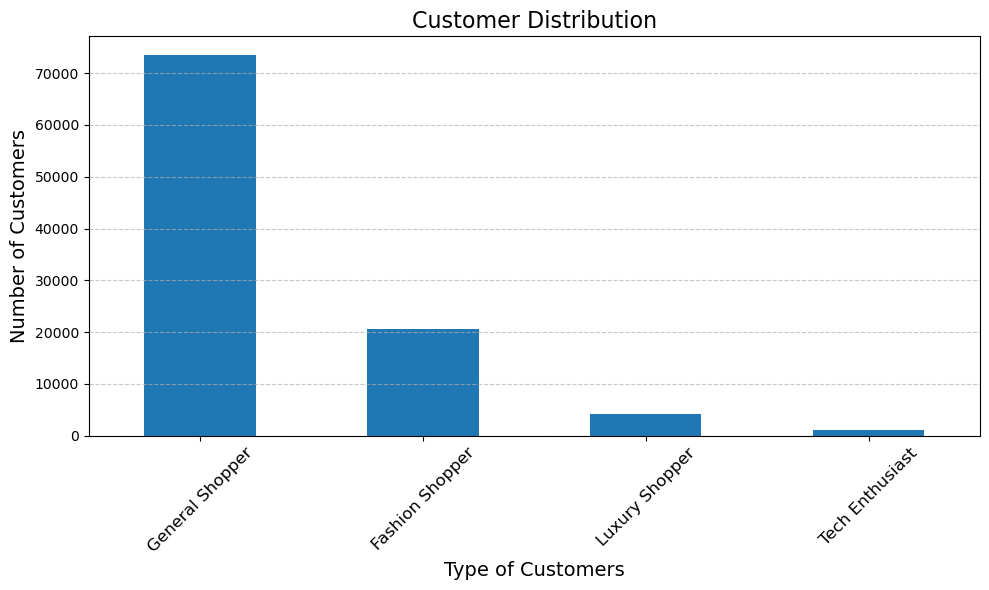

In [17]:
# Christina
#Rule Based Classifier

label_encoders = {}
for column in ['gender', 'category', 'payment_method', 'shopping_mall']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

category_mapping = dict(zip(label_encoders['category'].classes_, range(len(label_encoders['category'].classes_))))

def rule_based_classifier(row):
    clothing_encoded = category_mapping['Clothing']
    technology_encoded = category_mapping['Technology']
    shoes_encoded = category_mapping['Shoes']
    female_encoded = label_encoders['gender'].transform(['Female'])[0]
    credit_card_encoded = label_encoders['payment_method'].transform(['Credit Card'])[0]
    
    if row['age'] < 30 and row['category'] == technology_encoded:
        return 'Tech Enthusiast'
    elif row['gender'] == female_encoded and row['category'] == clothing_encoded:
        return 'Fashion Shopper'
    elif row['category'] in [shoes_encoded, technology_encoded] and row['price'] > 1000 and row['payment_method'] == credit_card_encoded:
        return 'Luxury Shopper'
    else:
        return 'General Shopper'

df['rule_based_segment'] = df.apply(rule_based_classifier, axis=1)

rule_based_summary = df['rule_based_segment'].value_counts()

rule_based_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Distribution', fontsize=16)
plt.xlabel('Type of Customers', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
#Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df['rule_based_segment_code'] = LabelEncoder().fit_transform(df['rule_based_segment'])

X = df[['age', 'gender', 'category', 'quantity', 'price', 'payment_method', 'shopping_mall']]
y = df['rule_based_segment_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=LabelEncoder().fit(df['rule_based_segment']).classes_)

# Output results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_rep)

Accuracy: 72.80%

Classification Report:

                 precision    recall  f1-score   support

Fashion Shopper       0.64      0.51      0.57      4096
General Shopper       0.90      0.79      0.84     14704
 Luxury Shopper       0.18      0.61      0.28       883
Tech Enthusiast       0.22      0.73      0.34       209

       accuracy                           0.73     19892
      macro avg       0.49      0.66      0.51     19892
   weighted avg       0.81      0.73      0.76     19892



Cluster Centroids:
Cluster 0: [-0.3651912   0.81793087  1.72834899]
Cluster 1: [ 0.36798405  0.77261217 -0.26598363]
Cluster 2: [-0.15722842 -0.88474471 -0.39888143]


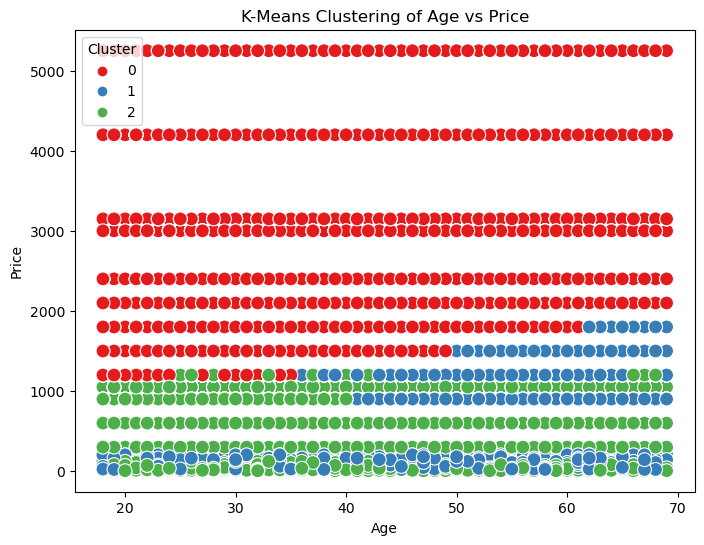

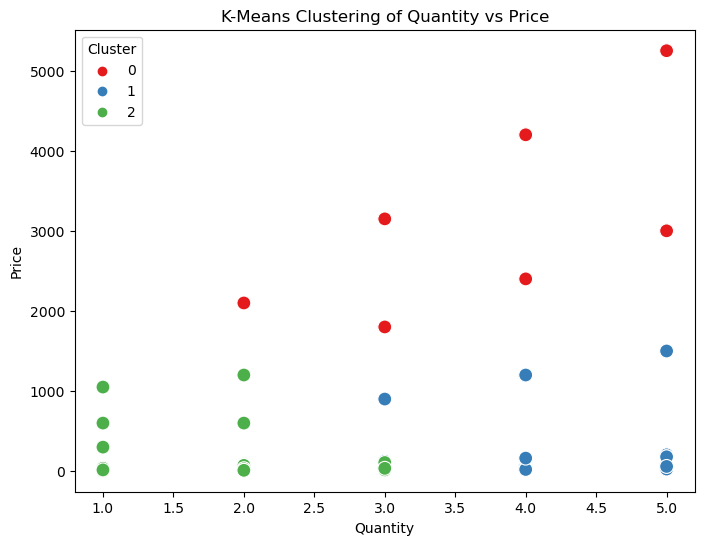

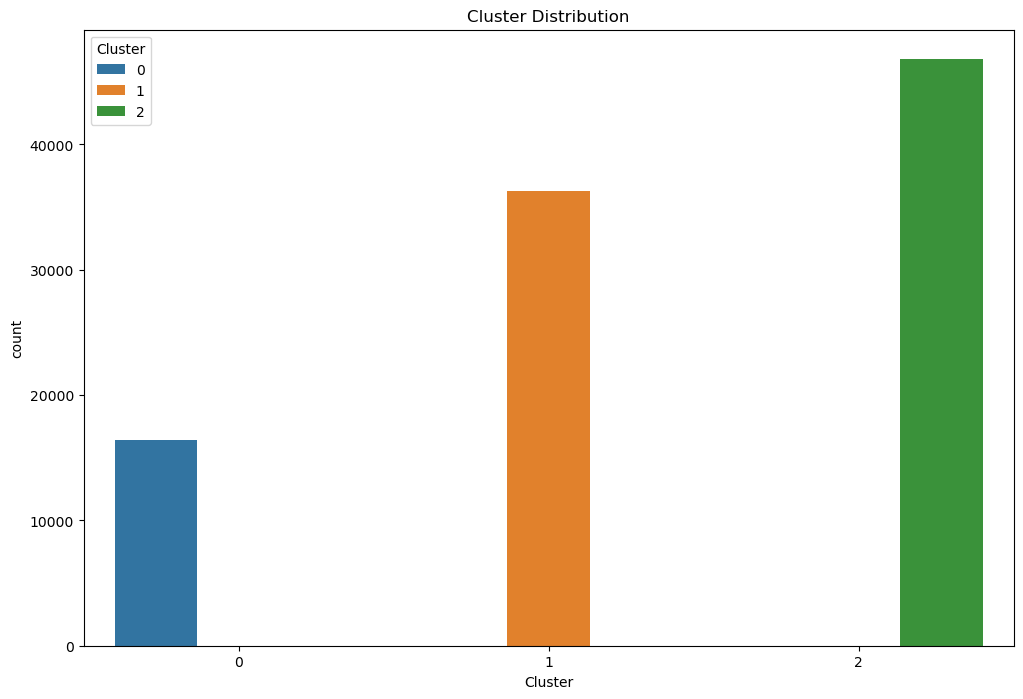

               age  quantity        price
Cluster                                  
0        37.952881  4.159180  2315.943541
1        48.943162  4.095144   438.917889
2        41.070238  1.753268   313.837165
Cluster
0    16384
1    36261
2    46812
dtype: int64


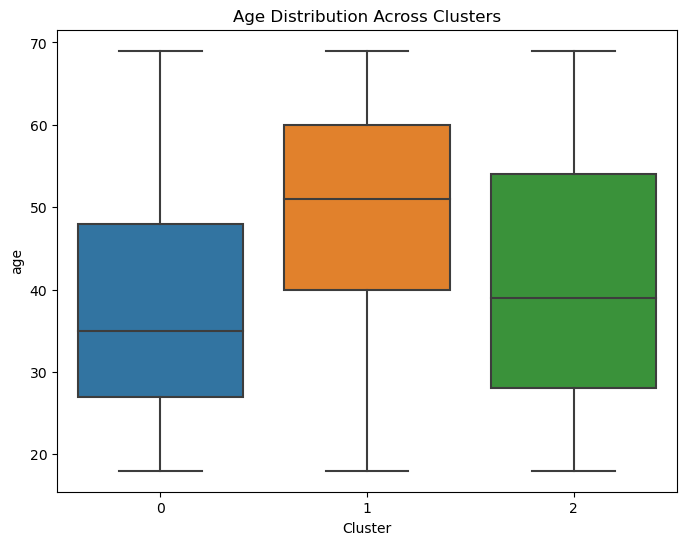

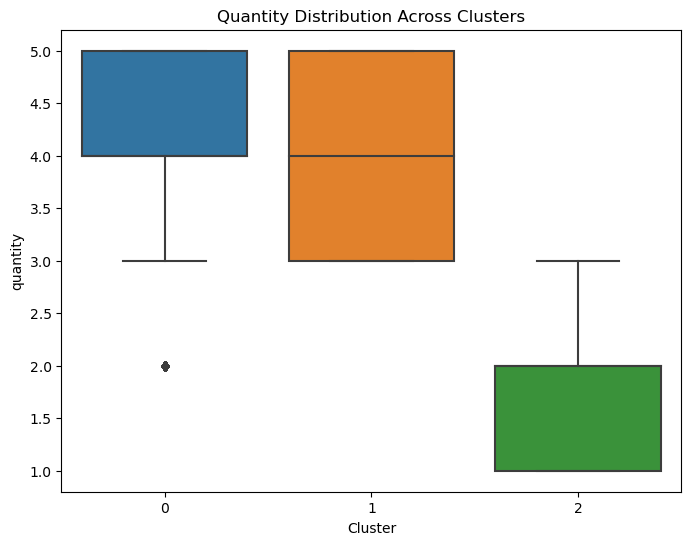

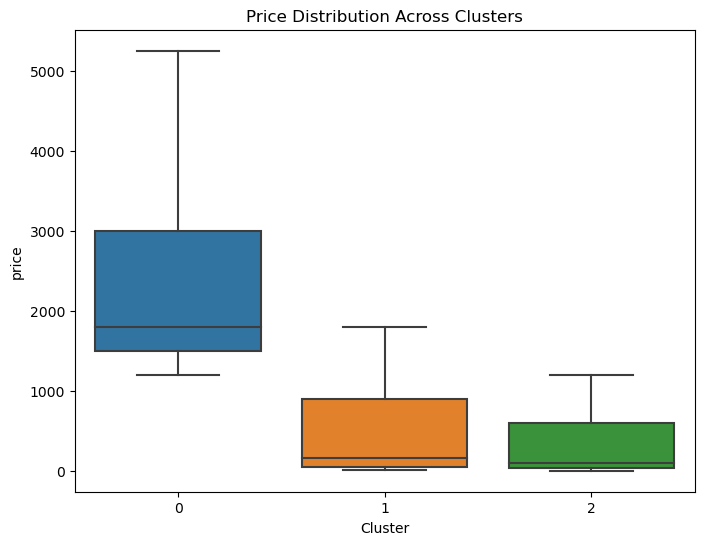

               age                     quantity                    \
              mean        std min max      mean       std min max   
cluster                                                             
0        43.407842  15.009139  18  69  2.628108  1.422132   1   5   
1        43.469344  14.886182  18  69  4.284559  0.700042   3   5   
2        43.463233  14.970877  18  69  3.587747  1.100150   1   5   

               price                                
                mean         std      min      max  
cluster                                             
0         166.866907  192.526367     5.23   600.17  
1        3339.864605  956.402980  2400.68  5250.00  
2        1273.926382  315.296779   900.24  2100.00  


In [23]:
# Gwen
#kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customer_shopping_data.csv')

data_subset = data[['age', 'quantity', 'price']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(data_scaled)

data['Cluster'] = clusters

print("Cluster Centroids:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {centroid}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['price'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering of Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['quantity'], y=data['price'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering of Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Cluster', hue='Cluster')
plt.title('Cluster Distribution')
plt.show()

#the cluster categories
cluster_means = data.groupby('Cluster')[['age', 'quantity', 'price']].mean()
print(cluster_means)
print(data.groupby('Cluster').size())

#distributions across clusters according to the columns
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Cluster', y='age')
plt.title('Age Distribution Across Clusters')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Cluster', y='quantity')
plt.title('Quantity Distribution Across Clusters')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Cluster', y='price')
plt.title('Price Distribution Across Clusters')
plt.show()

#mean min max
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('customer_shopping_data.csv')

kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data[['age', 'quantity', 'price']])

cluster_agg = data.groupby('cluster').agg({
    'age': ['mean', 'std', 'min', 'max'],
    'quantity': ['mean', 'std', 'min', 'max'],
    'price': ['mean', 'std', 'min', 'max']
})


print(cluster_agg)

  Obtaining dependency information for kmodes from https://files.pythonhosted.org/packages/1a/a8/0d3bf6f3340cbcb8cf4ad02c306d157af8f09ce86aadf5346e00605870dd/kmodes-0.12.2-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.
Data Types:
invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

Updated Data Types:
invoice_no          object
customer_id         object
gender            category
age                  int64
category          category
quantity             int64
price              float64
payment_method      object
invoice_date        object
shopping_mall     category
dtype: object
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 131067.0
Init: initi

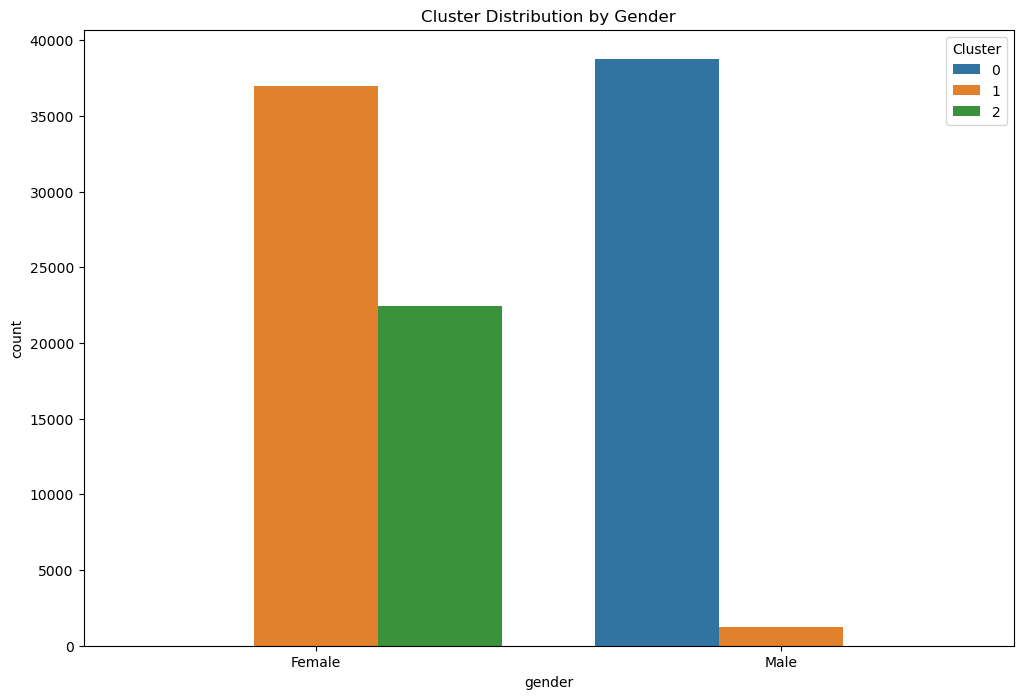

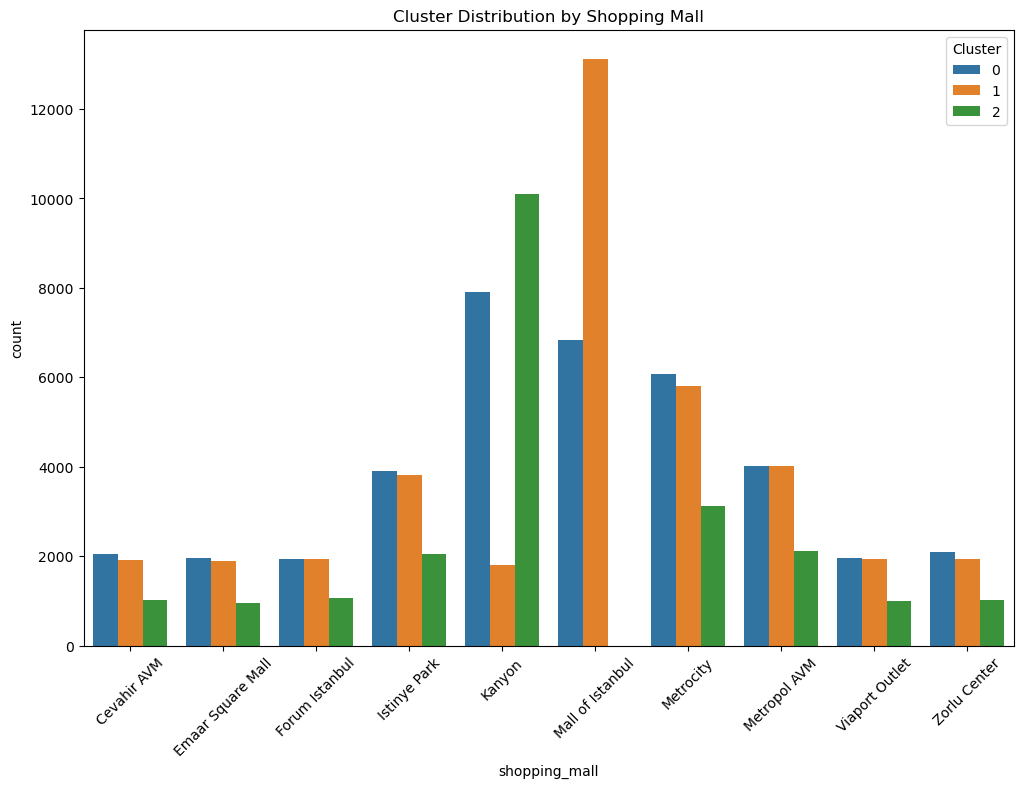

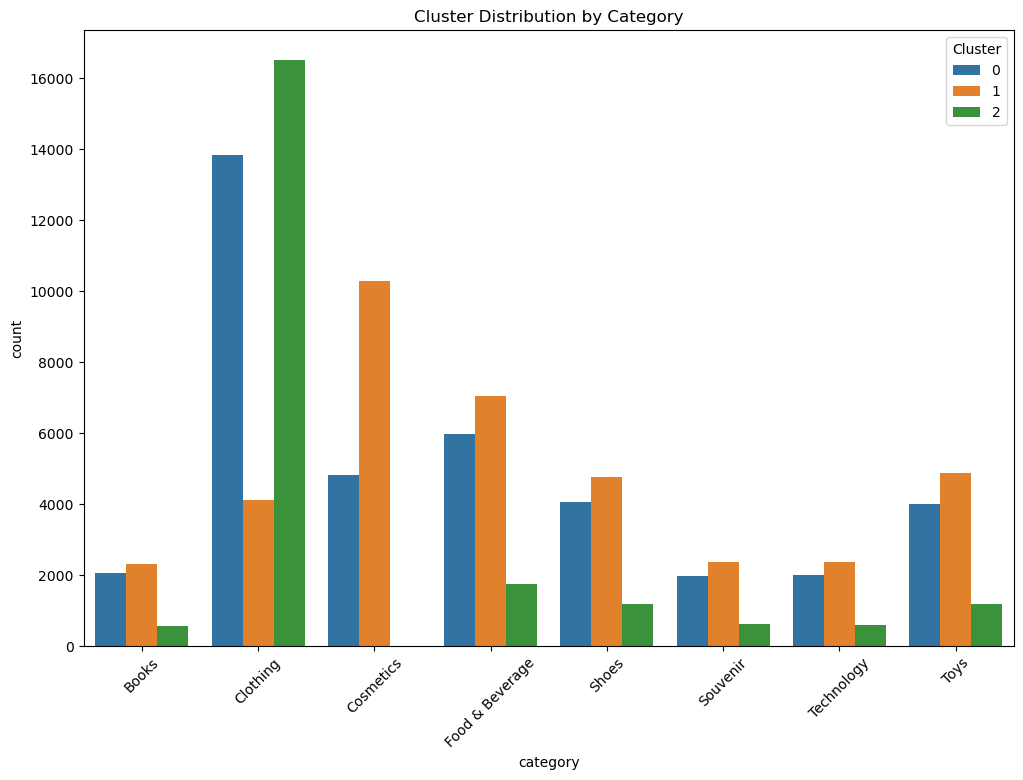

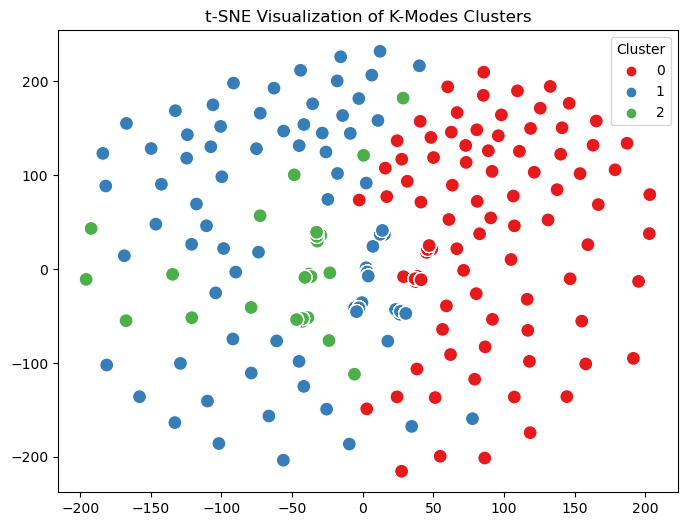

Cluster Centroids (Modes for each feature):

Cluster 0:
  Feature 'gender': Male
  Feature 'shopping_mall': Kanyon
  Feature 'category': Clothing

Cluster 1:
  Feature 'gender': Female
  Feature 'shopping_mall': Mall of Istanbul
  Feature 'category': Cosmetics

Cluster 2:
  Feature 'gender': Female
  Feature 'shopping_mall': Kanyon
  Feature 'category': Clothing


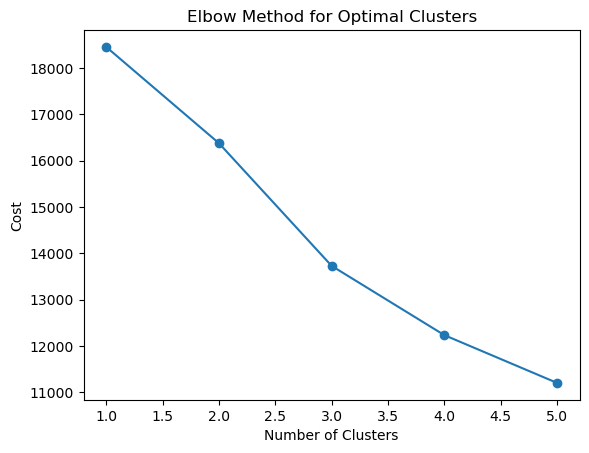

In [24]:
#kmodes
#k mode for qualitative
%pip install kmodes

import pandas as pd
from kmodes.kmodes import KModes
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('customer_shopping_data.csv')


print("Data Types:")
print(data.dtypes)


data['gender'] = data['gender'].astype('category')
data['shopping_mall'] = data['shopping_mall'].astype('category')
data['category'] = data['category'].astype('category')


print("\nUpdated Data Types:")
print(data.dtypes)


data_subset = data[['gender', 'shopping_mall', 'category']]


km = KModes(n_clusters=3, init='Huang', n_init=10, verbose=1)


clusters = km.fit_predict(data_subset)


print("\nCluster Labels (First 10 samples):")
print(clusters[:10])

data['Cluster'] = clusters

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='gender', hue='Cluster')
plt.title('Cluster Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='shopping_mall', hue='Cluster')
plt.title('Cluster Distribution by Shopping Mall')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='category', hue='Cluster')
plt.title('Cluster Distribution by Category')
plt.xticks(rotation=45)
plt.show()

from sklearn.manifold import TSNE

#tsne
data_encoded = pd.get_dummies(data_subset)  
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_encoded)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('t-SNE Visualization of K-Modes Clusters')
plt.show()


print("Cluster Centroids (Modes for each feature):")
for i, centroid in enumerate(km.cluster_centroids_):
    print(f"\nCluster {i}:")
    for j, feature_value in enumerate(centroid):
        
        print(f"  Feature '{data_subset.columns[j]}': {feature_value}")

#elbow
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

data = pd.read_csv('customer_shopping_data.csv')

data_subset = data[['gender', 'shopping_mall', 'category']]

data_subset_sample = data_subset.sample(frac=0.1, random_state=42)

cost = []

for n_clusters in range(1, 6):  
    km = KModes(n_clusters=n_clusters, init='Huang', n_init=1, max_iter=100, verbose=0)
    km.fit(data_subset_sample) 
    cost.append(km.cost_)  


plt.plot(range(1, 6), cost, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()